In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('C:\\Users\\user\\Downloads\\wine.csv')

In [5]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data1=data.iloc[:,1:]
data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
data1.shape

(178, 13)

In [9]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [10]:
data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [11]:
data1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
data1.isnull()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


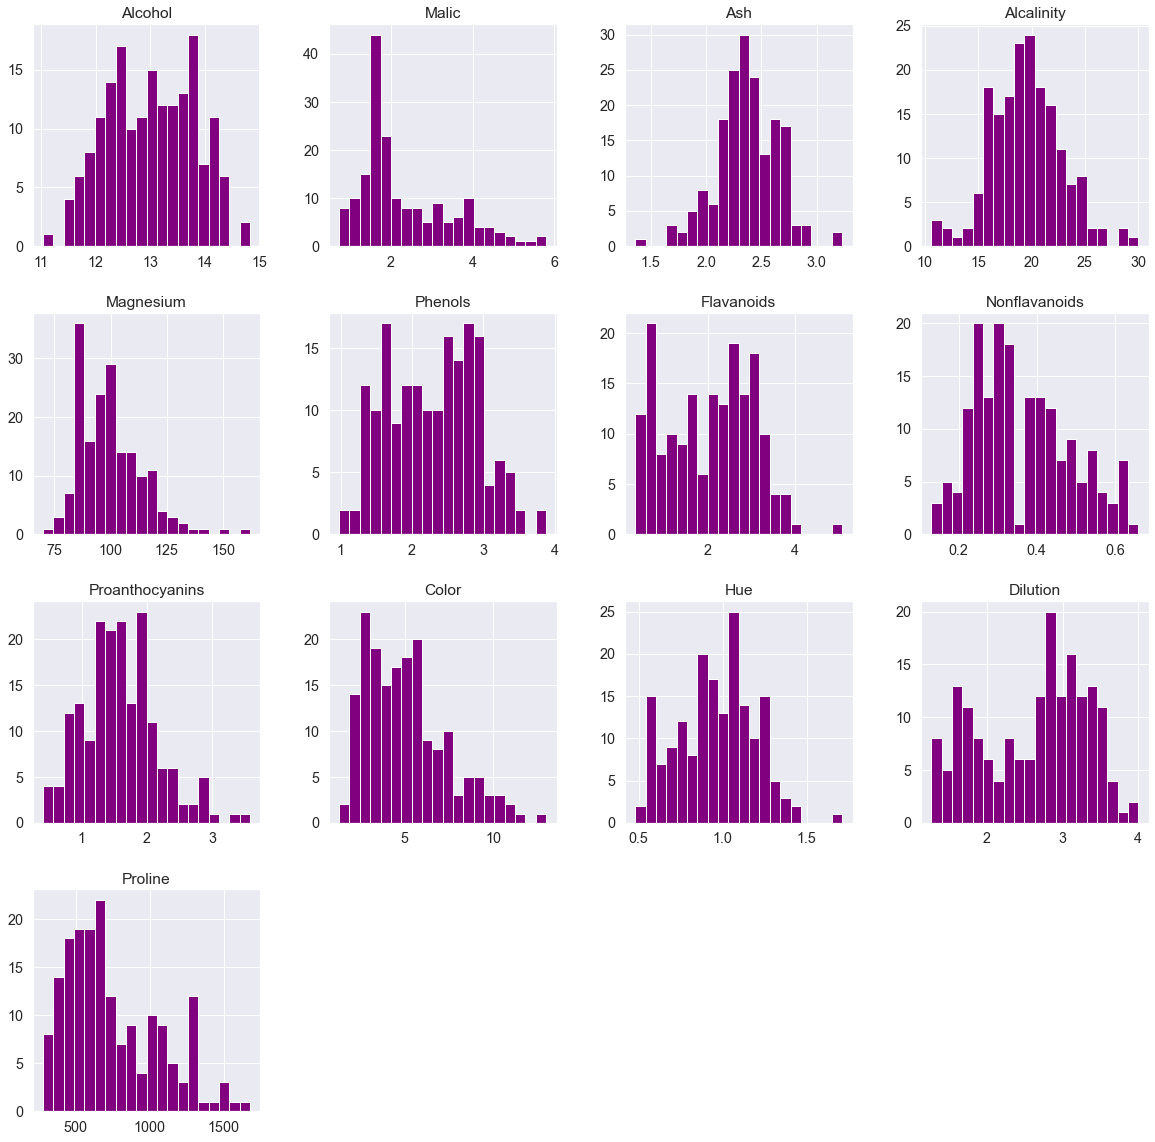

In [16]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data1.hist(bins=20,color='purple')

In [17]:
data1.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

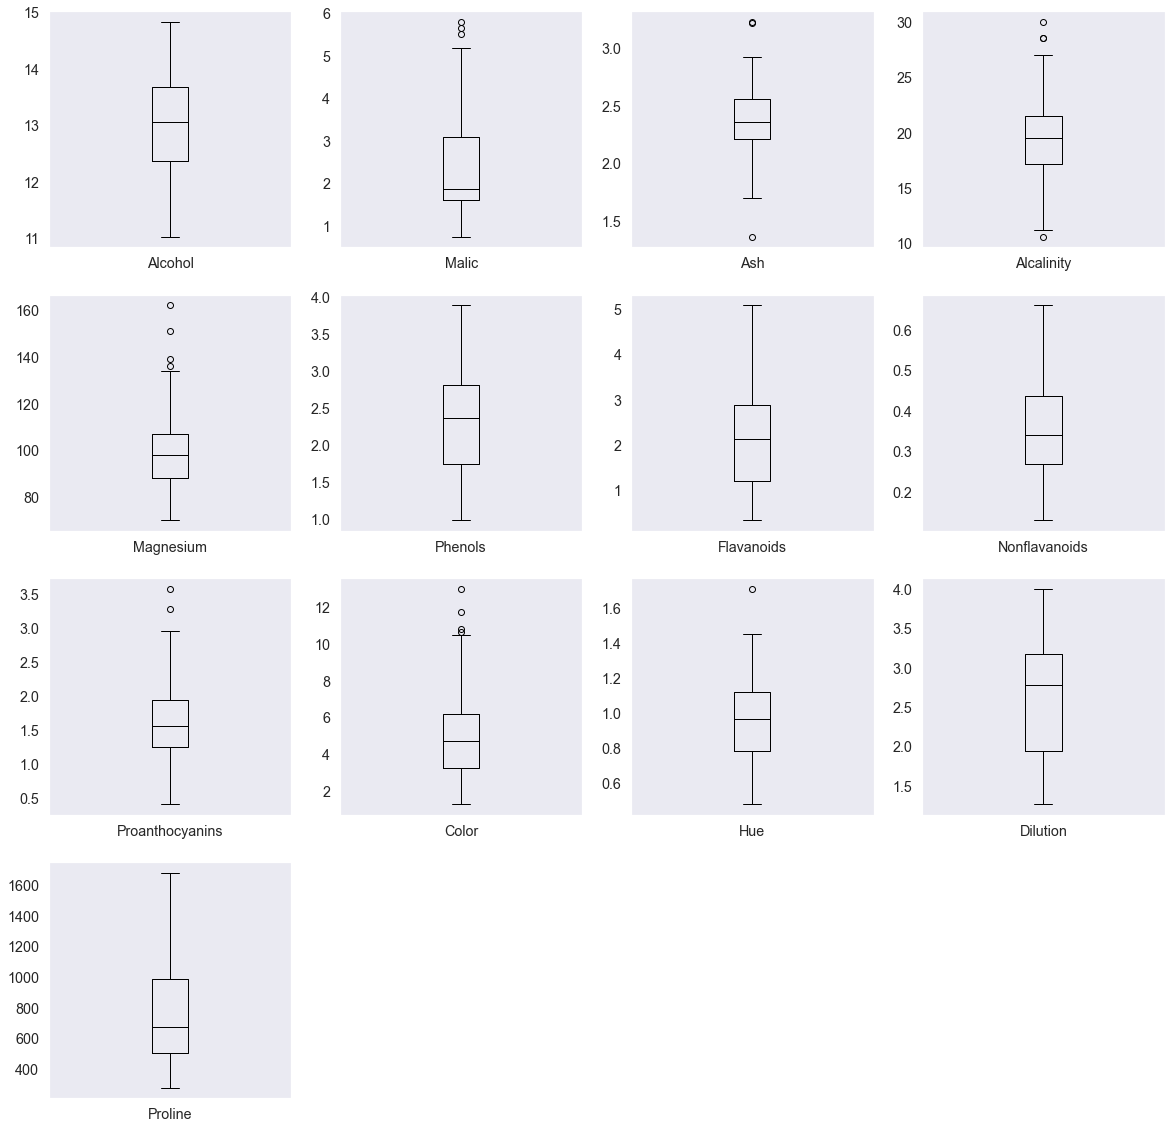

In [18]:
data1.plot(kind='box',subplots=True,layout=(4,4),color='black')
plt.show()

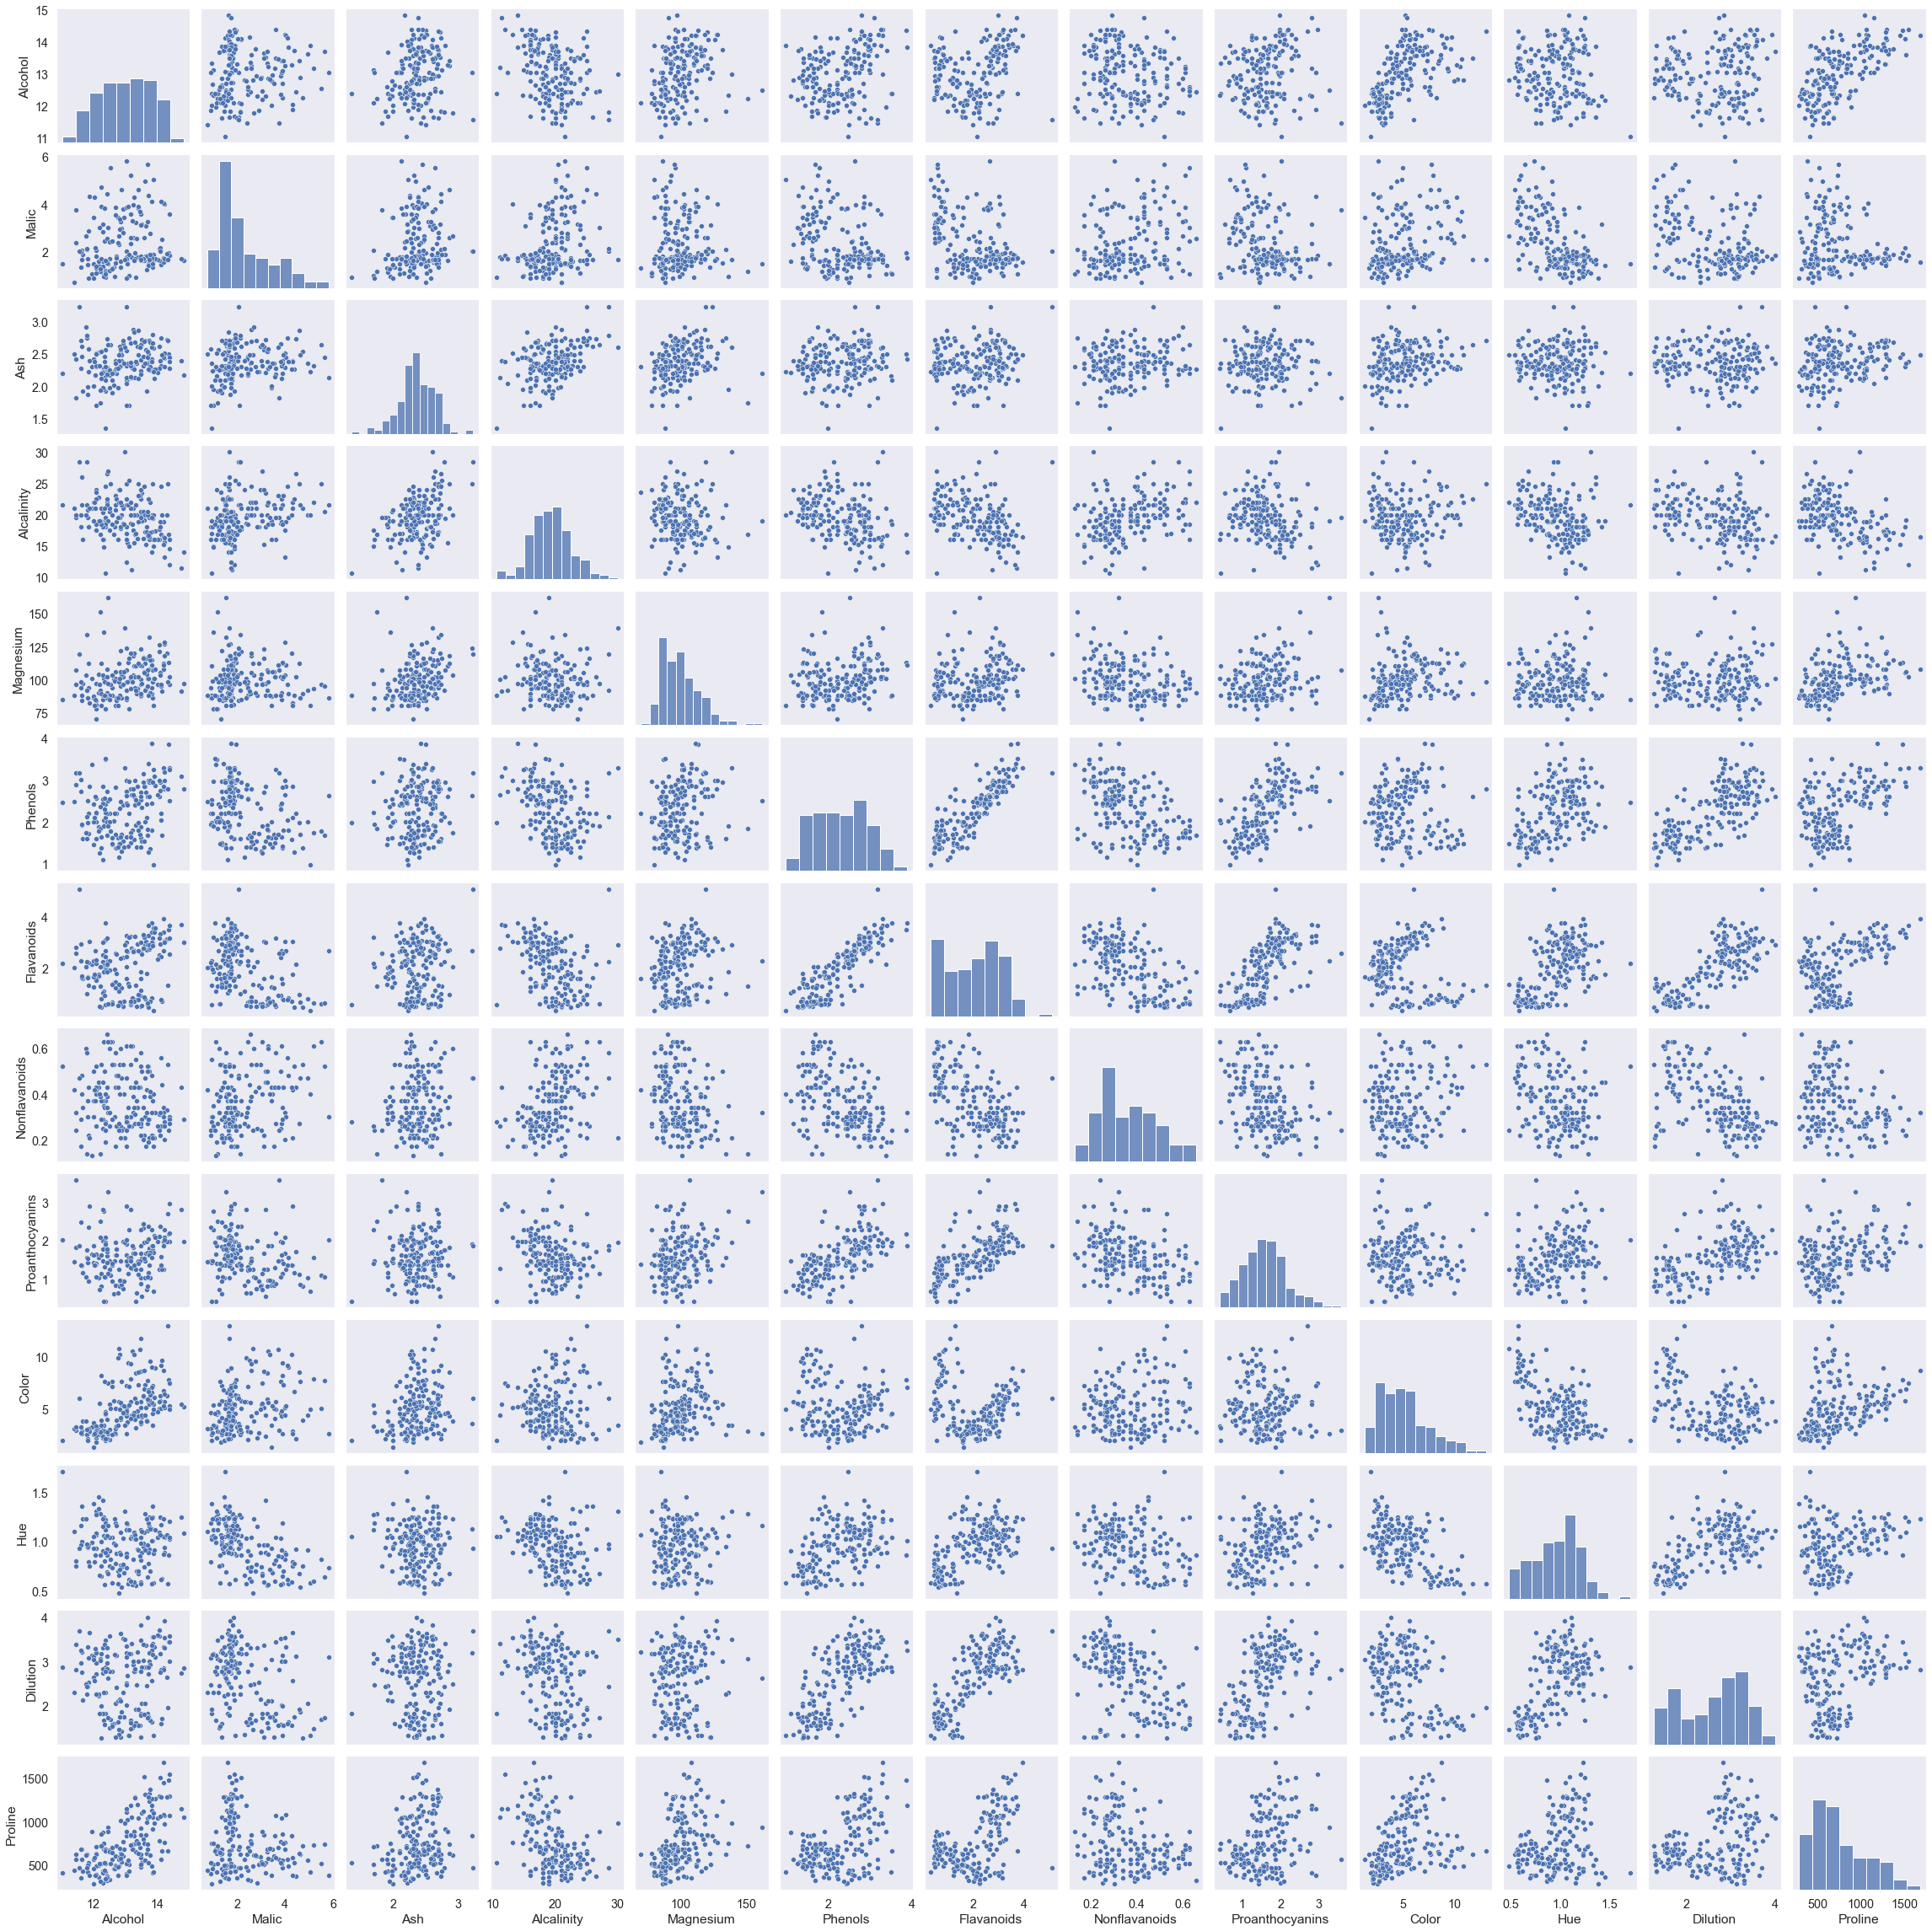

In [19]:
sns.pairplot(data1)

In [20]:
data1.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [21]:
#phenols are positively correlated with flavanoids,dilution,proanthocyanins
#flavanoids are positively correlated with proanthocyanins,dilution
#dilution is positively correlated with hue
#alcohol is positively correlated with proline

In [22]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax_df=minmax.fit_transform(data1)
minmax_df.shape

(178, 13)

In [26]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data1)
std_df.shape

(178, 13)

In [23]:
#PCA

In [27]:
pca=PCA()
pca.fit(std_df)

PCA()

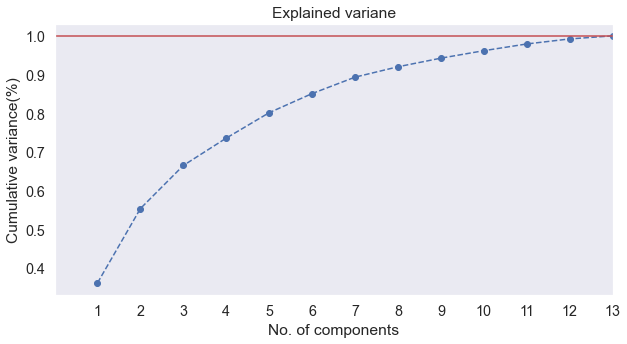

In [29]:
plt.figure(figsize=(10,5))
x=np.arange(1,1+std_df.shape[1],step=1)
y=np.cumsum(pca.explained_variance_ratio_)
plt.plot(x,y,marker='o',linestyle='--',color='b')

plt.xlim(0.0,1.1)
plt.xlabel('No. of components')
plt.xticks(x)
plt.ylabel('Cumulative variance(%)')
plt.title('Explained variane')
plt.axhline(y=1,color='r',linestyle='-')
plt.show()

In [30]:
variance=pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

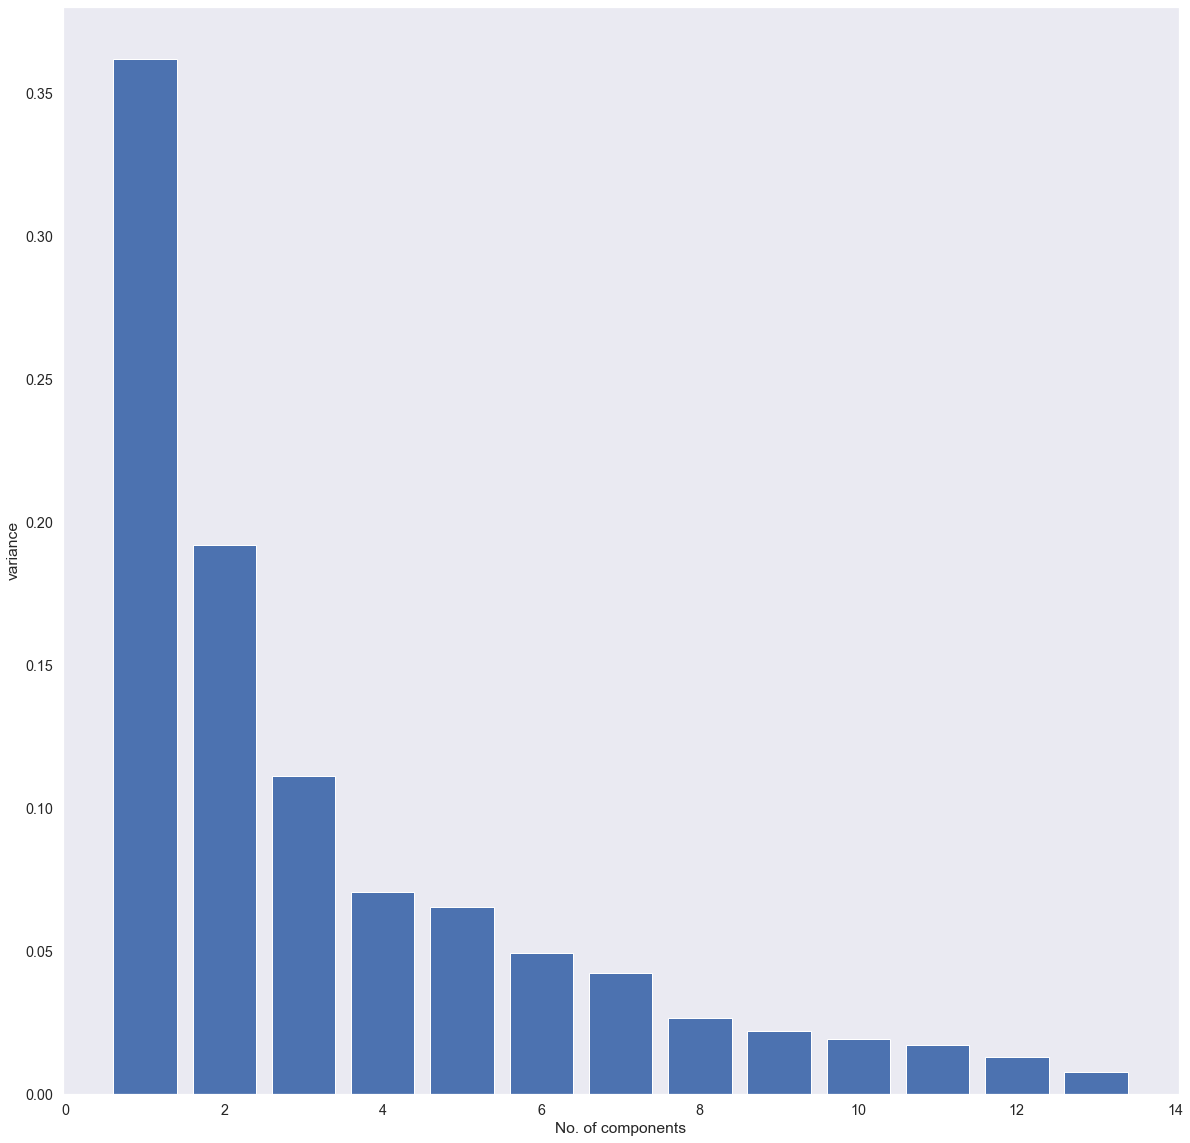

In [33]:
plt.bar(range(1,len(variance)+1),variance)
plt.xlabel('No. of components')
plt.ylabel('variance')
plt.show()

In [34]:
var1=np.cumsum(np.round(variance,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

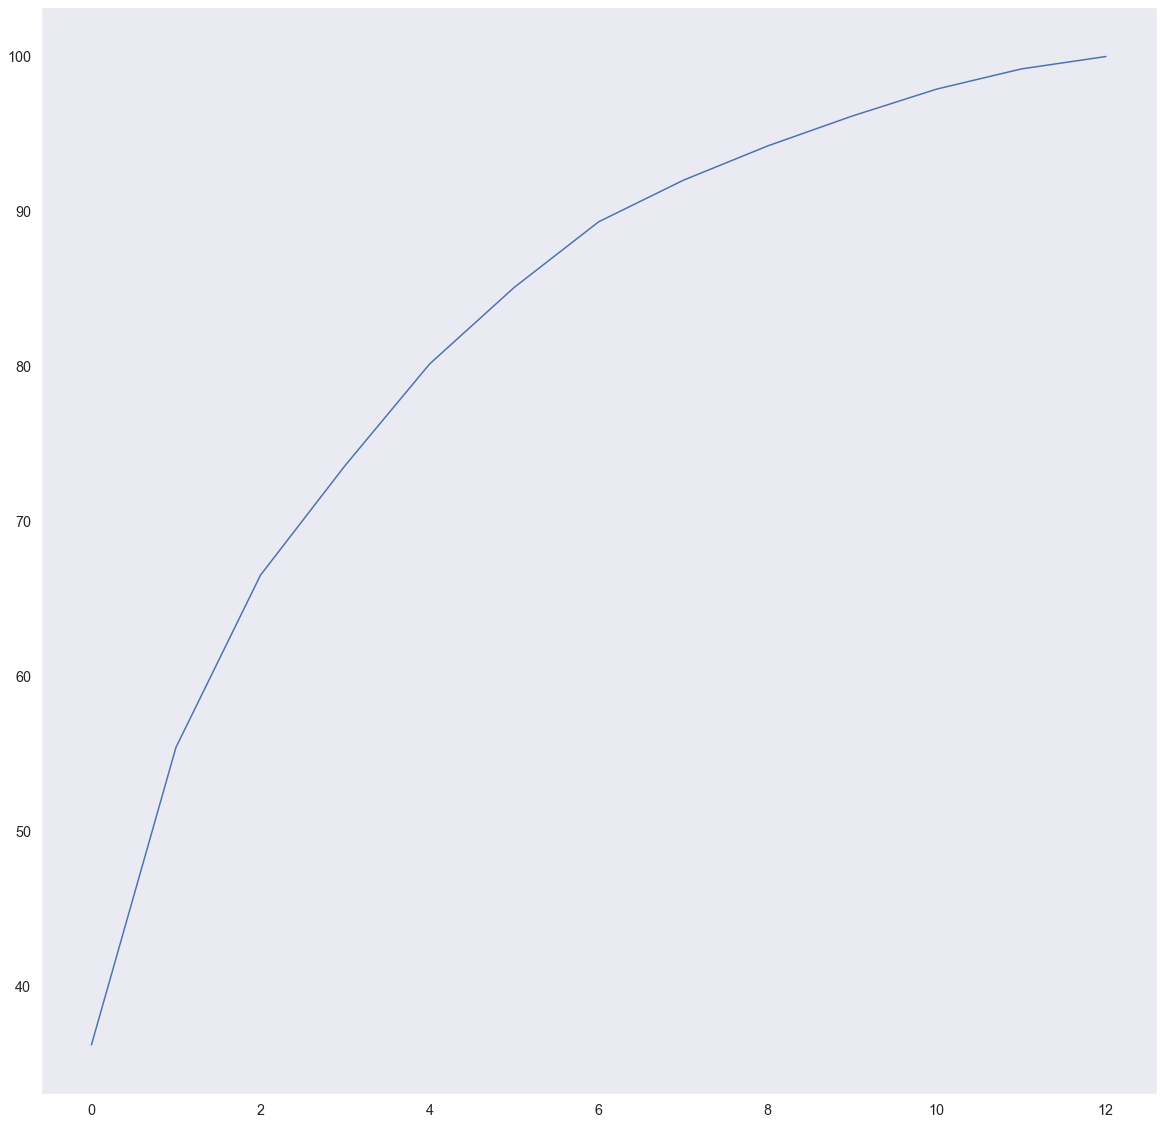

In [77]:
plt.plot(var1)

In [37]:
data2=data1.values
data2

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [38]:
data_norm=scale(data2)
data_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [39]:
pca=PCA(n_components=13)

data_pca=pca.fit_transform(data_norm)
data_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [40]:
final_df=pd.concat([data['Type'],pd.DataFrame(data_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Type,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


<AxesSubplot:>

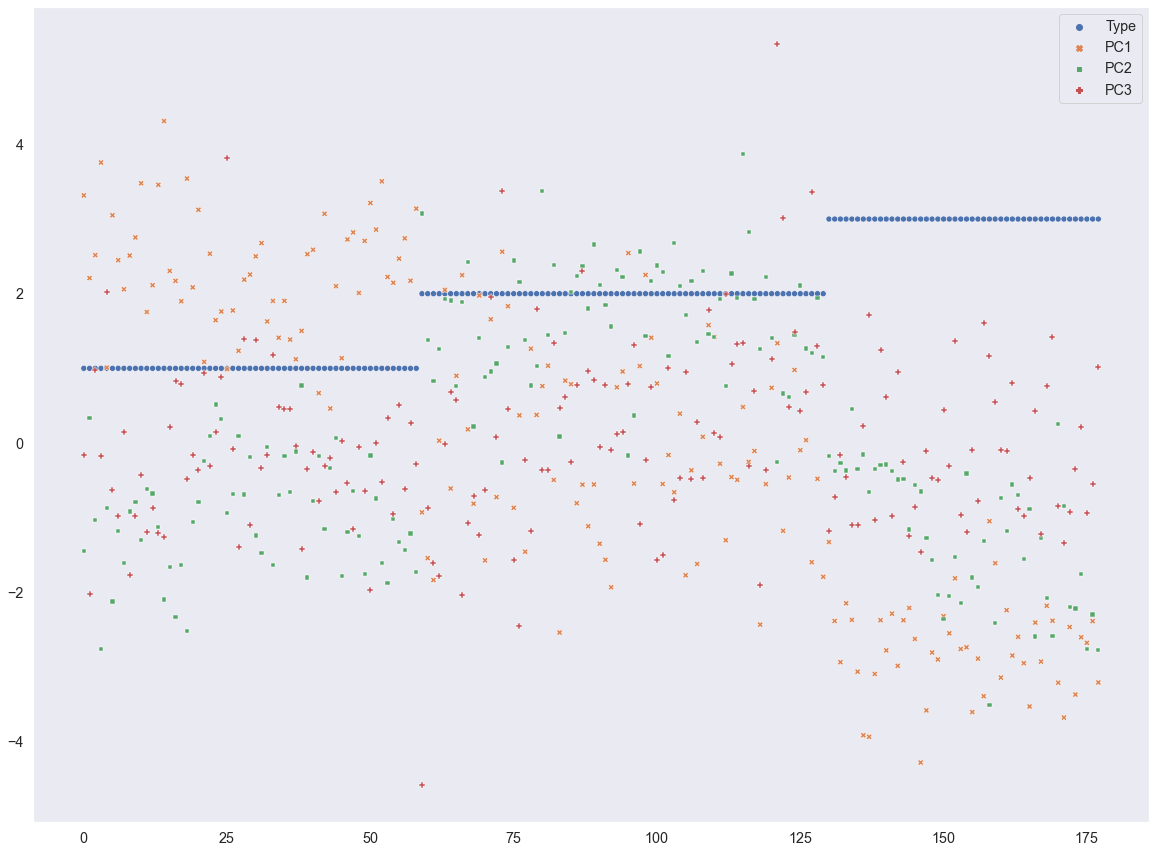

In [41]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=final_df)

In [42]:
#Hierarchial clustering

In [45]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize , MinMaxScaler

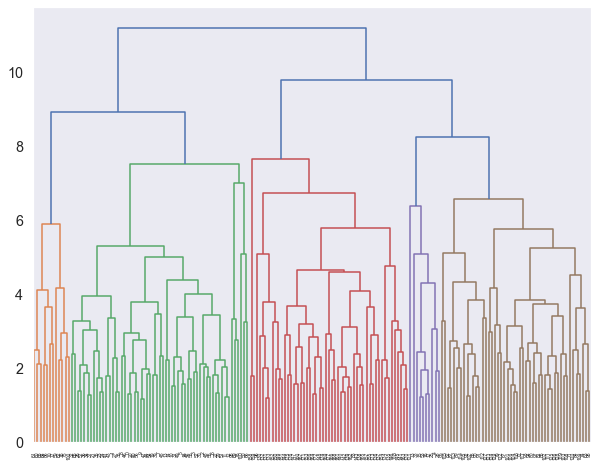

In [44]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(data_norm,'complete'))

In [46]:
minmax=MinMaxScaler()
minmax_df=minmax.fit_transform(data)
minmax_df.shape

(178, 14)

In [51]:
from sklearn.metrics import silhouette_score as sil
n_clusters=[2,3,4,5,6,7,8,9]
for n_clusters in n_clusters:
    for linkages in ['ward','complete','average','single']:
        hie_cluster1=AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1=hie_cluster1.fit_predict(final_df)
        silhouette_score1=sil(final_df,hie_labels1)
        print(f'for n_clusters={n_clusters} the average silhouette score with linkages {linkages} is {silhouette_score1}')
    print()

for n_clusters=2 the average silhouette score with linkages ward is 0.413824806151829
for n_clusters=2 the average silhouette score with linkages complete is 0.31761059947704134
for n_clusters=2 the average silhouette score with linkages average is 0.34685896076237915
for n_clusters=2 the average silhouette score with linkages single is 0.34685896076237915

for n_clusters=3 the average silhouette score with linkages ward is 0.4668325701106559
for n_clusters=3 the average silhouette score with linkages complete is 0.2858770893271514
for n_clusters=3 the average silhouette score with linkages average is 0.39778120977373477
for n_clusters=3 the average silhouette score with linkages single is 0.1187961104667086

for n_clusters=4 the average silhouette score with linkages ward is 0.3911399040548684
for n_clusters=4 the average silhouette score with linkages complete is 0.4067458703800719
for n_clusters=4 the average silhouette score with linkages average is 0.3238385313823991
for n_cluster

In [52]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [53]:
y=pd.DataFrame(hclusters.fit_predict(data_norm),columns=['clustersid'])

In [54]:
y['clustersid'].value_counts()

2    64
0    58
1    56
Name: clustersid, dtype: int64

In [55]:
dataframe=data.copy()
dataframe['clustersid']=hclusters.labels_
dataframe

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [57]:
#K means Clustering

In [58]:
from sklearn.cluster import KMeans

In [60]:
wcss=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

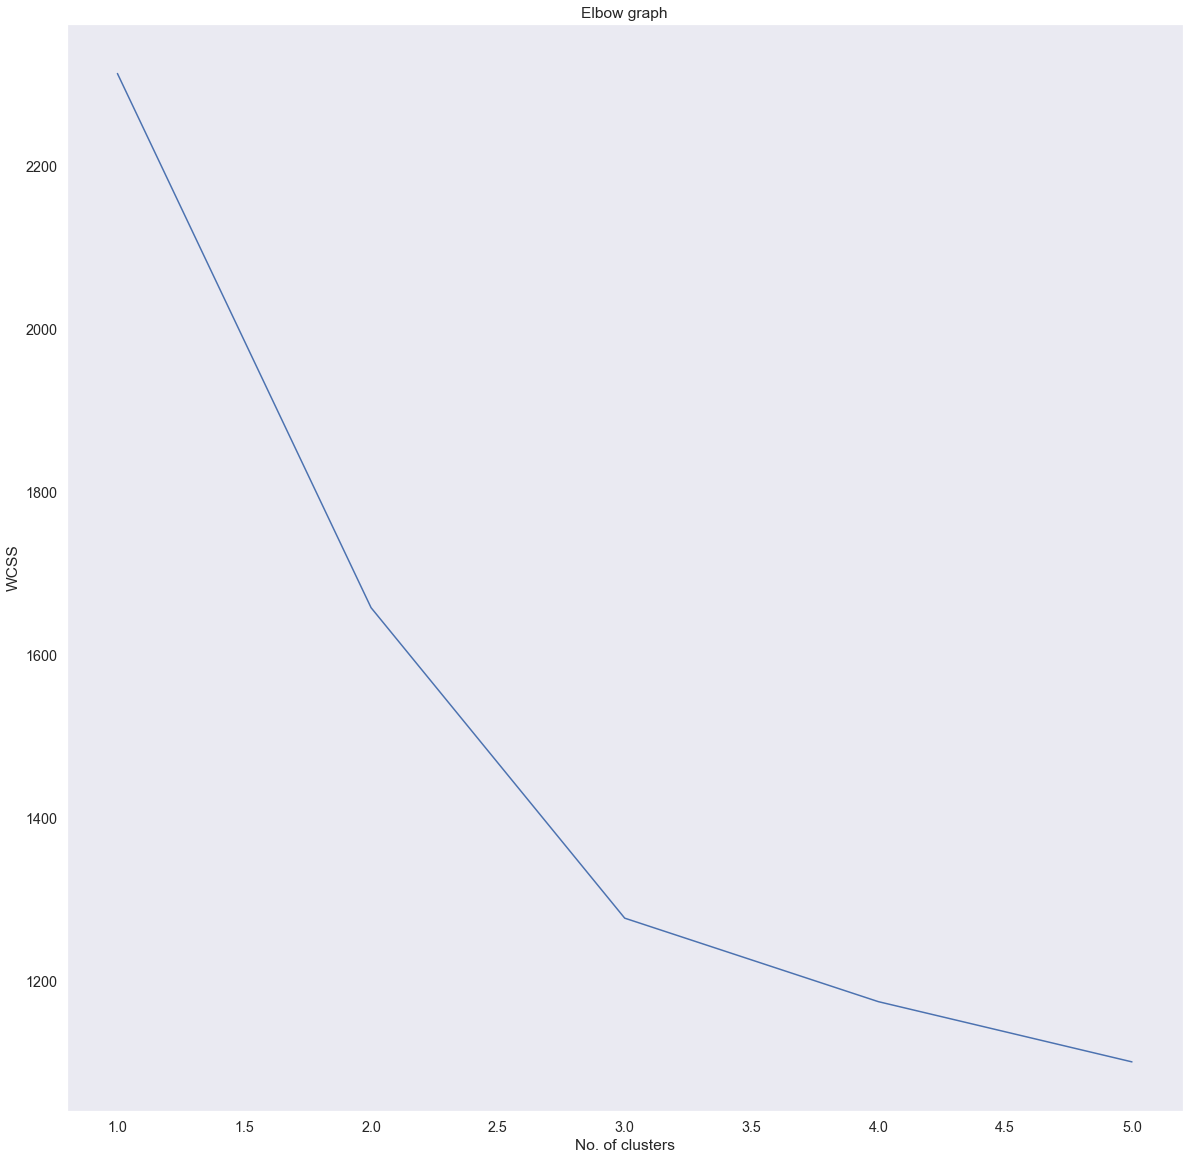

In [62]:
plt.plot(range(1,6),wcss)
plt.title('Elbow graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8,9,10]
clusters_inertia=[]
s_scores=[]
for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(final_df)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg = silhouette_score(final_df, KM_est.labels_)
    s_scores.append(silhouette_avg)

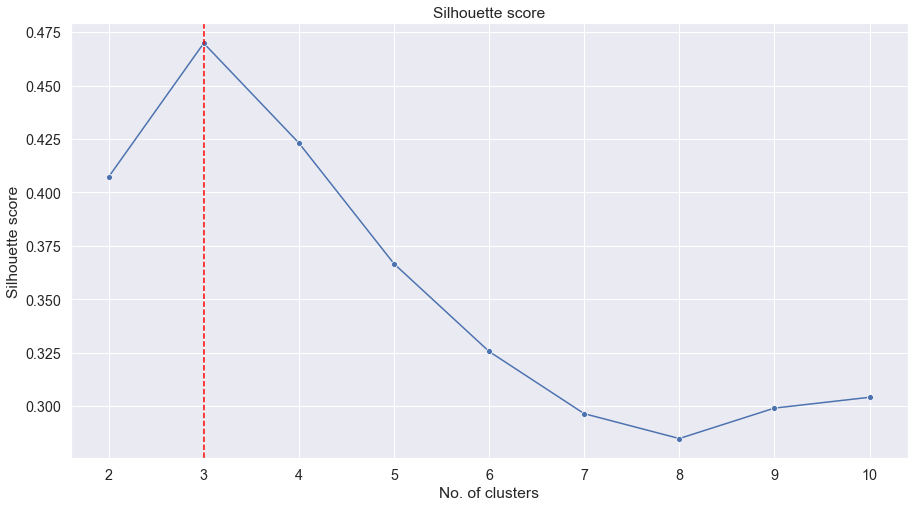

In [71]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.lineplot(n_clusters,s_scores,marker='o',ax=ax)
ax.set_title("Silhouette score")
ax.set_xlabel("No. of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3,ls="--",c="red")
plt.grid()
plt.show()

In [ ]:
#from silhouette score method the best optimum number of clusters is 3 

In [73]:
clust_list=[2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    cluste=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = cluste.fit_predict(final_df)
    sil_score1= sil(final_df,cluster_labels1)
    print(f'For n_clusters= {n_clusters} The average silhouette_score is { sil_score1}')


For n_clusters= 2 The average silhouette_score is 0.4072585700946354
For n_clusters= 3 The average silhouette_score is 0.46984615407102126
For n_clusters= 4 The average silhouette_score is 0.4231749152385672
For n_clusters= 5 The average silhouette_score is 0.40054433036498255
For n_clusters= 6 The average silhouette_score is 0.3373709903169728
For n_clusters= 7 The average silhouette_score is 0.3024384433869765
For n_clusters= 8 The average silhouette_score is 0.30501950184643456
For n_clusters= 9 The average silhouette_score is 0.2927566274844552


In [64]:
cluster3=KMeans(3,random_state=30).fit(data_norm)
cluster3

KMeans(n_clusters=3, random_state=30)

In [65]:
cluster3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [74]:
cluster3.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [75]:
cluster3.inertia_

1277.928488844642

In [68]:
dataframe2=data.copy()
dataframe2['clusters3id']=cluster3.labels_
dataframe2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [69]:
dataframe2['clusters3id'].value_counts()

2    65
1    62
0    51
Name: clusters3id, dtype: int64